## Introduction

There are many models for clustering out there. In this notebook, we will be presenting the model that is considered one of the simplest models amongst them. Despite its simplicity, the K-means is vastly used for clustering in many data science applications, especially useful if you need to quickly discover insights from unlabeled data. In this notebook, you will learn how to use k-Means for customer segmentation.

<hr>

## Requirements

In [2]:
import random
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\lucas\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


## Generating our own data
For this module we'll be generating our own data. First, we need to create a random seed using numpy

In [3]:
np.random.seed(0)

Next we will be making random clusters of points by using the make_blobs class. The make_blobs class can take in many inputs, but we will be using these specific ones.

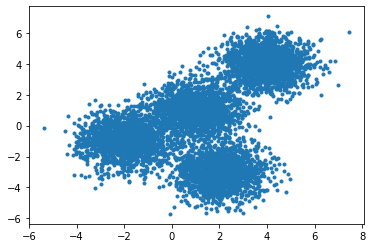

In [4]:
# Create blobs
x, y = make_blobs(n_samples = 7000, centers = [ [4, 4], [-2, -1], [2, -3], [1, 1] ], cluster_std = 0.9)

# Display blobs
plt.scatter(x[:, 0], x[:, 1], marker = '.')

Just by looking we can see that our blobs consists of 4 groups (that we have defined earlier), so now we can create a K-Means algorithm with k=4

## Setting up K-Means
The KMeans class has many parameters that can be used, but we will be using these three:
<br>
- init: Initialization method of the centroids.
Value will be: "k-means++", it selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.
<br>
- n_clusters: The number of clusters to form as well as the number of centroids to generate.
Value will be: 4 (since we have 4 centers)
<br>
- n_init: Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.
Value can be what you want but for a start I'm going with 20

In [5]:
kmeans = KMeans(init = 'k-means++', n_clusters = 4, n_init = 20)

Now we can fit this kmeans to our blob

In [6]:
kmeans.fit(x)

KMeans(n_clusters=4, n_init=20)

Now let's grab the labels for each point in the model using KMeans' .labels_ attribute and save it as kmeans_labels

In [7]:
kmeans_labels = kmeans.labels_
kmeans_labels

array([2, 0, 3, ..., 3, 3, 2])

We will also get the coordinates of the cluster centers using KMeans' .cluster_centers_ and save it as kmeans_cluster_centers

In [8]:
kmeans_cluster_centers = kmeans.cluster_centers_
kmeans_cluster_centers

array([[ 1.99046369, -3.02411916],
       [ 0.99123565,  0.98685184],
       [ 3.94931622,  3.9951108 ],
       [-1.99994996, -1.00913905]])

## Visualizing our clusters
So now that we have the random data generated and the KMeans model initialized, let's plot them and see what it looks like!

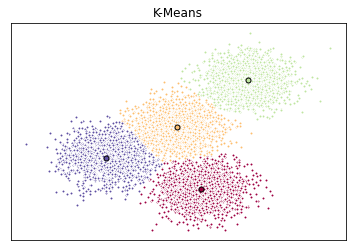

In [13]:
# Initialize the plot with this size
fig = plt.figure(figsize = (6, 4))

# Color each cluster with a different color
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(kmeans_labels))))

# Create a plot
xplot = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):
    # Create a list of all data points, where the data poitns that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    members = (kmeans_labels == k)
    
    # Define the centroid of this cluster
    centroid = kmeans_cluster_centers[k]
    
    # Plots the data points
    xplot.plot( x[members, 0], x[members, 1], 'w', markerfacecolor = col, marker = '.')
    
    # Plots the centroid
    xplot.plot( centroid[0], centroid[1], 'o', markerfacecolor = col, markeredgecolor = 'black', markersize = 5 )
    
    ## End of For ##
    
# Configs of the plot
xplot.set_title('K-Means')
xplot.set_xticks(())
xplot.set_yticks(())

# Show
plt.show()

<hr>

# Real Case Scenario
Now, let's use a real case.
<br>
Imagine that you have a customer dataset, and you need to apply customer segmentation on this historical data. Customer segmentation is the practice of partitioning a customer base into groups of individuals that have similar characteristics. It is a significant strategy as a business can target these specific groups of customers and effectively allocate marketing resources. For example, one group might contain customers who are high-profit and low-risk, that is, more likely to purchase products, or subscribe for a service. A business task is to retaining those customers. Another group might include customers from non-profit organizations. And so on.


## Loading the data

### Requirement

In [15]:
import pandas as pd

### Read CSV

In [16]:
data_raw = pd.read_csv('./data/Cust_Segmentation.csv')
data_raw.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


As you can see, Address in this dataset is a categorical variable. k-means algorithm isn't directly applicable to categorical variables because Euclidean distance function isn't really meaningful for discrete variables. So, lets drop this feature and run clustering.

In [17]:
data = data_raw.drop('Address', axis = 1)
data.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


## Normalizing values
As usual, we'll normalize vales so our algorithm has more accuracy

### Requirement

In [18]:
from sklearn.preprocessing import StandardScaler

### Normalizing

In [21]:
data_normalized = data.values[:,1:]
data_normalized = np.nan_to_num(data_normalized)

### Creating clusters

In [22]:
data_clustered = StandardScaler().fit_transform(data_normalized)
data_clustered

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

## Modeling
In our example (if we didn't have access to the k-means algorithm), it would be the same as guessing that each customer group would have certain age, income, education, etc, with multiple tests and experiments. However, using the K-means clustering we can do all this process much easier.

Lets apply k-means on our dataset, and take look at cluster labels.

### Create cluster

In [26]:
cluster_quantity = 3
k_means = KMeans(init = 'k-means++', n_clusters = cluster_quantity, n_init = 20)

### Train

In [28]:
k_means.fit(data_clustered)

labels = k_means.labels_

## Insights

We assign the labels to each row in the data

In [29]:
data['Clus_km'] = labels
data.head(5)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,1
1,2,47,1,26,100,4.582,8.218,0.0,12.8,0
2,3,33,2,10,57,6.111,5.802,1.0,20.9,2
3,4,29,2,4,19,0.681,0.516,0.0,6.3,1
4,5,47,1,31,253,9.308,8.908,0.0,7.2,0


We can easily check the centroid values by averaging the features in each cluster.

In [30]:
data.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,424.408163,43.000000,1.931973,17.197279,101.959184,4.220673,7.954483,0.162393,13.915646
1,426.122905,33.817505,1.603352,7.625698,36.143389,0.853128,1.816855,0.000000,7.964991
2,424.451807,31.891566,1.861446,3.963855,31.789157,1.576675,2.843355,0.993939,13.994578


Now, lets look at the distribution of customers based on their age and income:

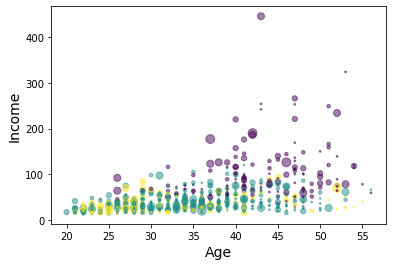

In [33]:
area = np.pi * (data_normalized[:, 1] ** 2)

plt.scatter( data_normalized[:, 0], data_normalized[:, 3], s = area, c = labels.astype(np.float), alpha = 0.5 )
plt.xlabel('Age', fontsize = 14)
plt.ylabel('Income', fontsize = 14)

plt.show()

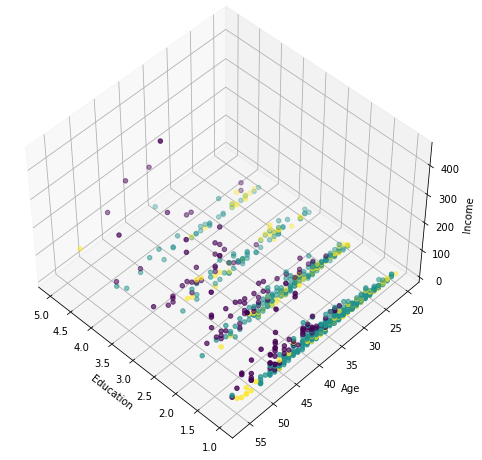

In [35]:
# Requirement
from mpl_toolkits.mplot3d import Axes3D

# Make figure
fig = plt.figure(1, figsize = (8, 6))
plt.clf()
ax = Axes3D(fig, rect = [0, 0, .95, 1], elev = 48, azim = 134)

# Plot
plt.cla()

# Configs
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(data_normalized[:, 1], data_normalized[:, 0], data_normalized[:, 3], c = labels.astype(np.float))

k-means will partition your customers into mutually exclusive groups, for example, into 3 clusters. The customers in each cluster are similar to each other demographically.
Now we can create a profile for each group, considering the common characteristics of each cluster. 
For example, the 3 clusters can be:

-   AFFLUENT, EDUCATED AND OLD AGED
-   MIDDLE AGED AND MIDDLE INCOME
-   YOUNG AND LOW INCOME
